# Aims
- Test making occupancy data sets
- import pickle  data and put it into ft entity sets
- check that can select only records that are active for a window in a morning

In [2]:
#%cd ./flosp
import pandas as pd
import numpy as np
import seaborn as sns
import featuretools as ft
#import flosp
#import bradlib as bl
sns.set()

# from core import create_timeseries_from_events, make_callender_columns

# get raw data

In [3]:
IP = pd.read_pickle('./../../../3_Data/EDclassification/cleanSPELL.pkl')

In [4]:
IP.head(2)

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER,admission_type,ADM_METHOD_simple,ADM_TYPE,ward_moves
0,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,0,19,...,08-MAY-18 00:00,1160,UROLOGY ENDOSCOPY SGH,2009-04-29 14:19:00,2009-04-29 15:08:00,1,0,other,Day Case,1
1,352434524354,24,2,6279602,2009-08-20 23:00:00,2009-08-21 02:00:00,31,MATERNITY ANTE PARTUM,1,19,...,NaN,1269,DELIVERY SUITE,2009-08-20 23:00:00,2009-08-21 02:01:00,1,0,Maternity,Non-Elective,1


In [5]:
IP.head(2)

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER,admission_type,ADM_METHOD_simple,ADM_TYPE,ward_moves
0,353232538008,79,2,6222150,2009-04-29 14:19:00,2009-04-29 15:08:00,13,ELECTIVE PLANNED,0,19,...,08-MAY-18 00:00,1160,UROLOGY ENDOSCOPY SGH,2009-04-29 14:19:00,2009-04-29 15:08:00,1,0,other,Day Case,1
1,352434524354,24,2,6279602,2009-08-20 23:00:00,2009-08-21 02:00:00,31,MATERNITY ANTE PARTUM,1,19,...,NaN,1269,DELIVERY SUITE,2009-08-20 23:00:00,2009-08-21 02:01:00,1,0,Maternity,Non-Elective,1


In [6]:
IP.shape

(1315333, 25)

In [7]:
#### reduce number of records for simplicity
IP = IP[IP.discharge_date > pd.datetime(2012,11,1)]

In [8]:
IP.shape

(867397, 25)

In [9]:
IP.isnull().sum()

pseudo_patient_number                0
age_at__admission                    0
gender                               0
spell_number                         0
admission_date                       0
discharge_date                       0
admission_method_code                0
admission_method_description         0
length_of_stay_days                  0
admission_source_code                0
admission_source_description         0
discharge_method_code                0
discharge_method_description         0
discharge_destination_code           0
discharge_destination_desc           0
date_of_death                   746555
ward_code                            0
ward_code_description                0
ward_stay_start_date                 0
ward_stay_end_date                   1
LOCATION_NUMBER                      0
admission_type                       0
ADM_METHOD_simple                    0
ADM_TYPE                             0
ward_moves                           0
dtype: int64

# clean ED

ED['wait_time_total'] = (ED['time_leaving_dept_inc_cdu'] - ED['arrival'])/pd.Timedelta(1,'m')

ED['arr_date'] = ED.arrival.apply(lambda x: x.date())

# create es

In [10]:
es = ft.EntitySet(id='admissions')
es

Entityset: admissions
  Entities:
  Relationships:
    No relationships

#### select columns

In [11]:
for i in IP.columns:
    print("'" + i + "',")

'pseudo_patient_number',
'age_at__admission',
'gender',
'spell_number',
'admission_date',
'discharge_date',
'admission_method_code',
'admission_method_description',
'length_of_stay_days',
'admission_source_code',
'admission_source_description',
'discharge_method_code',
'discharge_method_description',
'discharge_destination_code',
'discharge_destination_desc',
'date_of_death',
'ward_code',
'ward_code_description',
'ward_stay_start_date',
'ward_stay_end_date',
'LOCATION_NUMBER',
'admission_type',
'ADM_METHOD_simple',
'ADM_TYPE',
'ward_moves',


In [12]:
IP.head()

,pseudo_patient_number,age_at__admission,gender,spell_number,admission_date,discharge_date,admission_method_code,admission_method_description,length_of_stay_days,admission_source_code,...,date_of_death,ward_code,ward_code_description,ward_stay_start_date,ward_stay_end_date,LOCATION_NUMBER,admission_type,ADM_METHOD_simple,ADM_TYPE,ward_moves
343067,512555122372,89,2,1700182146,2012-01-17 19:45:00,2012-12-22 06:00:00,21,EMERGENCY A+E,340,19,...,22-DEC-12 00:00,1145,AMU ADMISSIONS 1,2012-01-17 19:45:00,2012-01-18 17:27:00,1,0,ED,Non-Elective,2
372413,860484604724,0,1,1700217349,2012-04-06 07:45:00,2012-11-07 10:17:00,28,OTHER EMERGENCY,215,51,...,28-AUG-15 00:00,186,PAEDIATRIC INTENSIVE CARE UNIT,2012-04-06 07:45:00,2012-04-11 16:30:00,1,0,other,Non-Elective,12
389637,920494200160,53,1,1700237749,2012-05-24 19:30:00,2013-01-27 16:17:00,22,EMERGENCY GP,248,19,...,02-JAN-14 00:00,1117,THE RESPIRATORY CENTRE,2012-12-04 12:56:00,2012-12-04 12:57:00,1,0,GP,Non-Elective,26
389672,630565305715,71,1,1700237796,2012-05-24 18:50:00,2012-11-02 10:00:00,28,OTHER EMERGENCY,162,19,...,19-DEC-13 00:00,168,MEDICAL ENDOSCOPY UNIT E LEVEL,2012-08-07 15:58:00,2012-08-07 16:32:00,1,0,other,Non-Elective,11
393598,270525705735,0,2,1700242461,2012-06-05 13:25:00,2013-04-08 06:00:00,28,OTHER EMERGENCY,307,51,...,23-JAN-15 00:00,186,PAEDIATRIC INTENSIVE CARE UNIT,2012-06-05 13:25:00,2012-06-08 16:15:00,1,0,other,Non-Elective,3


In [13]:
df_ip = IP[[
# 'pseudo_patient_number',
'age_at__admission',
'gender',
'spell_number',
'admission_date',
'discharge_date',
# 'admission_method_code',
# 'admission_method_description',
'length_of_stay_days',
# 'admission_source_code',
# 'admission_source_description',
# 'discharge_method_code',
# 'discharge_method_description',
# 'discharge_destination_code',
# 'discharge_destination_desc',
# 'date_of_death',
# 'ward_code',
# 'ward_code_description',
# 'ward_stay_start_date',
# 'ward_stay_end_date',
# 'LOCATION_NUMBER',
# 'admission_type',
'ADM_METHOD_simple',
'ADM_TYPE',
'ward_moves',
    
        ]]

for i in ED.columns:
    print(i)
    print(ED[i].dtype)

In [14]:
df_ip.head(2)

,age_at__admission,gender,spell_number,admission_date,discharge_date,length_of_stay_days,ADM_METHOD_simple,ADM_TYPE,ward_moves
343067,89,2,1700182146,2012-01-17 19:45:00,2012-12-22 06:00:00,340,ED,Non-Elective,2
372413,0,1,1700217349,2012-04-06 07:45:00,2012-11-07 10:17:00,215,other,Non-Elective,12


#### make attendances

In [15]:
es = es.entity_from_dataframe(entity_id='IPadm',
                        dataframe=df_ip,
                         # dataframe=df_ed[:],
                    index='spell_number',
                        time_index='admission_date',
                              secondary_time_index={'discharge_date':['length_of_stay_days','ward_moves']}, #,,'flag_bedreq']},
                             variable_types={'admission_date':ft.variable_types.Datetime,
                                            'discharge_date':ft.variable_types.Datetime,
#                                              'pseudo_patient_number':ft.variable_types.Id,
                                             'age_at__admission':ft.variable_types.Numeric,
                                             'gender':ft.variable_types.Categorical,
                                             'length_of_stay_days':ft.variable_types.Numeric,
                                             'ADM_METHOD_simple':ft.variable_types.Categorical,
                                            'ADM_TYPE':ft.variable_types.Categorical,
                                            'ward_moves':ft.variable_types.Numeric,
#                                              'flag_admission':ft.variable_types.Numeric,
#                                              'flag_bedreq':ft.variable_types.Categorical,
#                                              'flag_specreq':ft.variable_types.Categorical,
#                                              'flag_cdu':ft.variable_types.Categorical,
})

#### look at time index's

es['EDatt'].last_time_index = es['EDatt'].df['time_leaving_dept_inc_cdu'] # necessary? or should set for now?

In [16]:
es['IPadm'].df['admission_date'].head()

1700182146   2012-01-17 19:45:00
1700217349   2012-04-06 07:45:00
1700237796   2012-05-24 18:50:00
1700237749   2012-05-24 19:30:00
1700242461   2012-06-05 13:25:00
Name: admission_date, dtype: datetime64[ns]

In [17]:
es['IPadm'].secondary_time_index

{'discharge_date': ['length_of_stay_days', 'ward_moves', 'discharge_date']}

es['EDatt'].last_time_index.head()

In [18]:
es['IPadm']

Entity: IPadm
  Variables:
    spell_number (dtype: index)
    admission_date (dtype: datetime_time_index)
    discharge_date (dtype: datetime)
    age_at__admission (dtype: numeric)
    gender (dtype: categorical)
    length_of_stay_days (dtype: numeric)
    ADM_METHOD_simple (dtype: categorical)
    ADM_TYPE (dtype: categorical)
    ward_moves (dtype: numeric)
  Shape:
    (Rows: 867397, Columns: 9)

#### make link table 

Note: table is made of visits that were active within an each entire hour, not at the hour.

In [19]:
from create_data import make_HourlyTimeAttenNum_dataframe,make_timeindex_dataframe

In [20]:
df_ActiveVisits = make_HourlyTimeAttenNum_dataframe(es['IPadm'].df,'admission_date','discharge_date')

In [21]:
df_ActiveVisits['day'] = df_ActiveVisits['hour'].apply(lambda x : x.date())

In [22]:
df_ActiveVisits.head()

,atten_id,hour,day
0,1700182146,2012-01-17 19:00:00,2012-01-17
1,1700182146,2012-01-17 20:00:00,2012-01-17
2,1700182146,2012-01-17 21:00:00,2012-01-17
3,1700182146,2012-01-17 22:00:00,2012-01-17
4,1700182146,2012-01-17 23:00:00,2012-01-17


In [23]:
es['IPadm']

Entity: IPadm
  Variables:
    spell_number (dtype: index)
    admission_date (dtype: datetime_time_index)
    discharge_date (dtype: datetime)
    age_at__admission (dtype: numeric)
    gender (dtype: categorical)
    length_of_stay_days (dtype: numeric)
    ADM_METHOD_simple (dtype: categorical)
    ADM_TYPE (dtype: categorical)
    ward_moves (dtype: numeric)
  Shape:
    (Rows: 867397, Columns: 9)

#### add link table to entitity set with  

In [24]:
# Make linking-es (active_visits)
es = es.entity_from_dataframe(entity_id='link',
                               dataframe=df_ActiveVisits,
                              make_index=True,
                              index='index',
                               variable_types={'atten_id':ft.variable_types.Id,
                                              'hour':ft.variable_types.Datetime,
                                              'day':ft.variable_types.Datetime
                                              })

In [25]:
# add es relationships
rel_Atten_Link = ft.Relationship(es["IPadm"]["spell_number"],
                                    es["link"]["atten_id"])
# rel_Hours_ActiveVisits = ft.Relationship(es["hours"]["hour"],
#                                     es["active_visits"]["hour"])
# rel_Days_Hours = ft.Relationship(es["days"]["day"],
#                                     es["hours"]["day"])
es = es.add_relationships([rel_Atten_Link]) 

#### make date entity

In [26]:
es = es.normalize_entity(base_entity_id='link',
                        new_entity_id = 'days',
                        index = 'day',
                        )

In [27]:
es

Entityset: admissions
  Entities:
    IPadm [Rows: 867397, Columns: 9]
    link [Rows: 65622512, Columns: 4]
    days [Rows: 2456, Columns: 1]
  Relationships:
    link.atten_id -> IPadm.spell_number
    link.day -> days.day

##### make patient table - (removed for time being to make simpler features, possible to have info on readmissions directly in EDatt enitity - calced manually)

es = es.normalize_entity(base_entity_id='EDatt',
                   new_entity_id ='EDpatients',
                   index='pseudo_patient_number',
                         make_time_index=True,
                   additional_variables=['gender'])

es = es.normalize_entity(base_entity_id='EDatt',
                   new_entity_id ='days',
                   index='arr_date',
#                          make_time_index=True,
#                    additional_variables=['gender'])
                        )


es['days'].df.head()

### make date es

start = ED.arrival.min()
end = ED.arrival.max()
days = pd.DataFrame(pd.DatetimeIndex(freq='d',start=start,end=end),columns=['arr_date'])

# feature gen

In [28]:
es

Entityset: admissions
  Entities:
    IPadm [Rows: 867397, Columns: 9]
    link [Rows: 65622512, Columns: 4]
    days [Rows: 2456, Columns: 1]
  Relationships:
    link.atten_id -> IPadm.spell_number
    link.day -> days.day

fm, features = ft.dfs(entityset=es,
                       target_entity='EDatt',
                     trans_primitives=['day'])

ft.list_primitives().head(10)

ft.list_primitives().query('type == "transform"')

fm, features = ft.dfs(entityset=es,
                       target_entity='days',
                     trans_primitives=['day','month'],
                     agg_primitives=['count','mean','num_true'])

In [108]:
fm, features = ft.dfs(entityset=es,
                       target_entity='days',
#                      trans_primitives=['day','month','year','weekend'],
#                      agg_primitives=['count'],
                      max_depth=3
                     )
#                      agg_primitives=['count','mean','num_true'])
fm.head(3)

,COUNT(link),NUM_UNIQUE(link.atten_id),MODE(link.atten_id),SUM(link.IPadm.age_at__admission),SUM(link.IPadm.length_of_stay_days),SUM(link.IPadm.ward_moves),STD(link.IPadm.age_at__admission),STD(link.IPadm.length_of_stay_days),STD(link.IPadm.ward_moves),MAX(link.IPadm.age_at__admission),...,NUM_UNIQUE(link.IPadm.WEEKDAY(discharge_date)),MODE(link.IPadm.MODE(link.day)),MODE(link.IPadm.DAY(admission_date)),MODE(link.IPadm.DAY(discharge_date)),MODE(link.IPadm.YEAR(admission_date)),MODE(link.IPadm.YEAR(discharge_date)),MODE(link.IPadm.MONTH(admission_date)),MODE(link.IPadm.MONTH(discharge_date)),MODE(link.IPadm.WEEKDAY(admission_date)),MODE(link.IPadm.WEEKDAY(discharge_date))
day,,,,,,,,,,,,,,,,,,,,,
2012-01-17,5,1,1700182146,445,1700.0,10.0,0.0,0.0,0.0,89,...,1,2012-01-18,17,22,2012,2012,1,12,1,5
2012-01-18,24,1,1700182146,2136,8160.0,48.0,0.0,0.0,0.0,89,...,1,2012-01-18,17,22,2012,2012,1,12,1,5
2012-01-19,24,1,1700182146,2136,8160.0,48.0,0.0,0.0,0.0,89,...,1,2012-01-18,17,22,2012,2012,1,12,1,5


In [30]:
%matplotlib inline

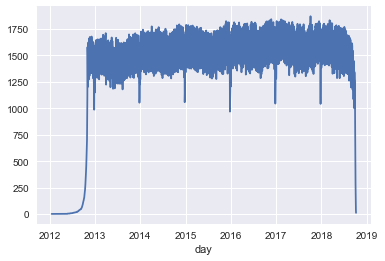

In [110]:
fm['NUM_UNIQUE(link.atten_id)'].plot()

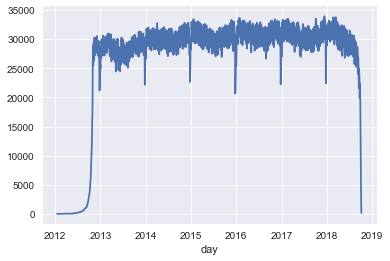

In [113]:
fm['COUNT(link)'].plot()

## clean features

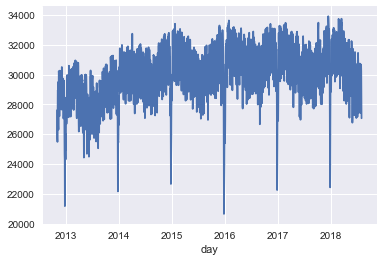

In [123]:
fm['COUNT(link)'][290:-70].plot()

In [124]:
fm = fm[290:-70]

In [125]:
from utils import find_duplicate_column_names

dup_names = find_duplicate_column_names(fm)

In [126]:
dup_names

['NUM_UNIQUE(link.DAY(hour))',
 'NUM_UNIQUE(link.YEAR(hour))',
 'NUM_UNIQUE(link.MONTH(hour))',
 'NUM_UNIQUE(link.WEEKDAY(hour))',
 'NUM_UNIQUE(link.IPadm.WEEKDAY(admission_date))']

In [127]:
def find_columns_single_value(df):
    "takes df. returns list of columns names which contain all the same value."
    cols_to_drop = []
    for col in df.columns:
        col_values_list = df[col].unique()
        if len(col_values_list) == 1:
            cols_to_drop.append(col)
    return(cols_to_drop)

single_names = find_columns_single_value(fm)

In [128]:
single_names

['MIN(link.IPadm.age_at__admission)',
 'MIN(link.IPadm.length_of_stay_days)',
 'MIN(link.IPadm.ward_moves)',
 'NUM_UNIQUE(link.DAY(hour))',
 'NUM_UNIQUE(link.YEAR(hour))',
 'NUM_UNIQUE(link.MONTH(hour))',
 'NUM_UNIQUE(link.WEEKDAY(hour))',
 'NUM_UNIQUE(link.IPadm.ADM_METHOD_simple)',
 'NUM_UNIQUE(link.IPadm.ADM_TYPE)',
 'MODE(link.IPadm.ADM_TYPE)',
 'MIN(link.IPadm.NUM_UNIQUE(link.day))',
 'NUM_UNIQUE(link.IPadm.WEEKDAY(admission_date))',
 'NUM_UNIQUE(link.IPadm.WEEKDAY(discharge_date))']

fm = fm.drop(single_names,axis=1)

fm.drop(dup_names,axis=1)

In [129]:
fm.shape

(2096, 65)

In [130]:
def save_es_as_pickle(fm, features, name):
    " Take fm df and rename columns. Save as pickle."
    for col in fm.columns:
        fm.rename(columns={col:name + '_' + col},inplace=True)
    
    fm.to_pickle('./../../../3_Data/EDclassification/processed/' + name + '.pkl')

In [131]:
fm.index = fm.index.shift(1,'d')

In [132]:
fm.head()

,COUNT(link),NUM_UNIQUE(link.atten_id),MODE(link.atten_id),SUM(link.IPadm.age_at__admission),SUM(link.IPadm.length_of_stay_days),SUM(link.IPadm.ward_moves),STD(link.IPadm.age_at__admission),STD(link.IPadm.length_of_stay_days),STD(link.IPadm.ward_moves),MAX(link.IPadm.age_at__admission),...,NUM_UNIQUE(link.IPadm.WEEKDAY(discharge_date)),MODE(link.IPadm.MODE(link.day)),MODE(link.IPadm.DAY(admission_date)),MODE(link.IPadm.DAY(discharge_date)),MODE(link.IPadm.YEAR(admission_date)),MODE(link.IPadm.YEAR(discharge_date)),MODE(link.IPadm.MONTH(admission_date)),MODE(link.IPadm.MONTH(discharge_date)),MODE(link.IPadm.WEEKDAY(admission_date)),MODE(link.IPadm.WEEKDAY(discharge_date))
day,,,,,,,,,,,,,,,,,,,,,
2012-11-03,27611,1522,1700182146,1666722,730991.0,86481.0,25.757638,34.891467,2.456135,103,...,7,2012-11-02,1,2,2012,2012,10,11,3,4
2012-11-04,25739,1244,1700182146,1585328,732515.0,83950.0,25.291990,35.460964,2.488888,103,...,7,2012-11-03,2,5,2012,2012,10,11,4,0
2012-11-05,25482,1203,1700182146,1580995,740162.0,84326.0,25.130712,35.513174,2.492697,103,...,7,2012-11-03,2,5,2012,2012,10,11,4,0
2012-11-06,27850,1512,1700182146,1697326,756104.0,88793.0,25.589629,34.855433,2.458824,103,...,7,2012-11-05,5,5,2012,2012,10,11,0,0
2012-11-07,28940,1581,1700182146,1744030,761991.0,90161.0,25.988895,34.902147,2.456908,103,...,7,2012-11-06,5,6,2012,2012,11,11,0,1


In [133]:
save_es_as_pickle(fm, features, 'IPprevday')

# morning es

In [137]:
es['IPadm'].df.admission_date.min()

Timestamp('2012-01-17 19:45:00')

In [148]:
fm.index.max()

Timestamp('2012-01-20 00:00:00')

In [149]:
start = pd.datetime(2012,1,17,7)
# end = ED.arrival.max()
end = pd.datetime(2018,7,30,7)
ct = pd.DataFrame(pd.DatetimeIndex(freq='d',start=start,end=end),columns=['time'])
ct['day'] = ct.time.apply(lambda x: x.date())
ct.head()

,time,day
0,2012-01-17 07:00:00,2012-01-17
1,2012-01-18 07:00:00,2012-01-18
2,2012-01-19 07:00:00,2012-01-19
3,2012-01-20 07:00:00,2012-01-20
4,2012-01-21 07:00:00,2012-01-21


In [144]:
es['days'].df.head()

,day
2012-01-17,2012-01-17
2012-01-18,2012-01-18
2012-01-19,2012-01-19
2012-01-20,2012-01-20
2012-01-21,2012-01-21


In [150]:
fm, features = ft.dfs(entityset=es,
                       target_entity='days',
                     trans_primitives=[],
#                      agg_primitives=['count','mean','std','num_true','sum'],
                     cutoff_time=ct)

# save_es_as_pickle(fm, features, 'EDmorn')

fm.head(3)

KeyboardInterrupt: 

In [ ]:
save_es_as_pickle(fm, features, 'IPmorn')

In [1]:
break

SyntaxError: 'break' outside loop (<ipython-input-1-6aaf1f276005>, line 1)

In [ ]:
start = pd.datetime(2011,1,1,7)
end = ED.arrival.max()
ct = pd.DataFrame(pd.DatetimeIndex(freq='d',start=start,end=end),columns=['time'])
ct['arr_date'] = ct.time.apply(lambda x: x.date())
ct.head()

,time,arr_date
0,2011-01-01 07:00:00,2011-01-01
1,2011-01-02 07:00:00,2011-01-02
2,2011-01-03 07:00:00,2011-01-03
3,2011-01-04 07:00:00,2011-01-04
4,2011-01-05 07:00:00,2011-01-05


ft.list_primitives().query('type == "aggregation"')

In [ ]:
fm, features = ft.dfs(entityset=es,
                       target_entity='days',
                     trans_primitives=[],
                     agg_primitives=['count','mean','std','num_true','sum'],
                     cutoff_time=ct)

save_es_as_pickle(fm, features, 'EDmorn')

fm.head(3)

In [70]:
fm, features = ft.dfs(entityset=es,
                       target_entity='days',
                     trans_primitives=[],
                     agg_primitives=['count','mean','std','num_true','sum'],
#                      cutoff_time=ct,
                     )

fm.head(3)

,COUNT(EDatt),MEAN(EDatt.wait_time_total),MEAN(EDatt.flag_specreq),MEAN(EDatt.age),MEAN(EDatt.flag_admission),STD(EDatt.wait_time_total),STD(EDatt.flag_specreq),STD(EDatt.age),STD(EDatt.flag_admission),SUM(EDatt.wait_time_total),SUM(EDatt.flag_specreq),SUM(EDatt.age),SUM(EDatt.flag_admission)
arr_date,,,,,,,,,,,,,
2013-01-01,312,209.041667,0.737179,39.262821,0.375000,230.640702,0.440873,26.373184,0.484901,65221.0,230.0,12250.0,117.0
2013-01-02,257,260.194553,0.677043,41.264591,0.385214,227.621004,0.468519,26.953520,0.487595,66870.0,174.0,10605.0,99.0
2013-01-03,238,282.924370,0.693277,41.819328,0.436975,257.883045,0.462105,27.278779,0.497057,67336.0,165.0,9953.0,104.0


In [71]:
fm.index = fm.index.shift(1,'d')

In [72]:
save_es_as_pickle(fm, features, 'EDprevday')

In [73]:
break

SyntaxError: 'break' outside loop (<ipython-input-73-6aaf1f276005>, line 1)

In [57]:
fm.head(3)

,COUNT(EDatt),MEAN(EDatt.wait_time_total),MEAN(EDatt.age),STD(EDatt.wait_time_total),STD(EDatt.age),SUM(EDatt.wait_time_total),SUM(EDatt.age),DAY(first_EDatt_time),MONTH(first_EDatt_time)
arr_date,,,,,,,,,
2018-09-01,50,147.842105,43.100000,91.707423,25.160100,2809.0,2155.0,1,9
2018-09-02,47,161.533333,46.212766,85.856913,25.208639,2423.0,2172.0,2,9
2018-09-03,37,200.133333,51.945946,88.566252,31.102828,3002.0,1922.0,3,9


In [57]:
fm.head(3)

,COUNT(EDatt),MEAN(EDatt.wait_time_total),MEAN(EDatt.age),STD(EDatt.wait_time_total),STD(EDatt.age),SUM(EDatt.wait_time_total),SUM(EDatt.age),DAY(first_EDatt_time),MONTH(first_EDatt_time)
arr_date,,,,,,,,,
2018-09-01,50,147.842105,43.100000,91.707423,25.160100,2809.0,2155.0,1,9
2018-09-02,47,161.533333,46.212766,85.856913,25.208639,2423.0,2172.0,2,9
2018-09-03,37,200.133333,51.945946,88.566252,31.102828,3002.0,1922.0,3,9


In [67]:
ct2 = ct.copy()
ct2.drop('time',axis=1,inplace=True)
ct2['time'] = pd.to_datetime(ct['arr_date'])

ct2.head(2)

,arr_date,time
0,2018-09-01,2018-09-01
1,2018-09-02,2018-09-02


In [69]:
fm, features = ft.dfs(entityset=es,
                       target_entity='days',
                     trans_primitives=['day','month'],
                     agg_primitives=['count','mean','std','num_true','sum'],
                     cutoff_time=ct2,
                     training_window = '24h')

fm.head(3)

2019-04-11 11:48:55,199 featuretools.entityset - WARNING    Using training_window but last_time_index is not set on entity days
2019-04-11 11:48:55,215 featuretools.entityset - WARNING    Using training_window but last_time_index is not set on entity days
2019-04-11 11:48:55,228 featuretools.entityset - WARNING    Using training_window but last_time_index is not set on entity days
2019-04-11 11:48:55,245 featuretools.entityset - WARNING    Using training_window but last_time_index is not set on entity days
2019-04-11 11:48:55,264 featuretools.entityset - WARNING    Using training_window but last_time_index is not set on entity days
2019-04-11 11:48:55,284 featuretools.entityset - WARNING    Using training_window but last_time_index is not set on entity days
2019-04-11 11:48:55,297 featuretools.entityset - WARNING    Using training_window but last_time_index is not set on entity days
2019-04-11 11:48:55,314 featuretools.entityset - WARNING    Using training_window but last_time_index is

,COUNT(EDatt),MEAN(EDatt.wait_time_total),MEAN(EDatt.age),STD(EDatt.wait_time_total),STD(EDatt.age),SUM(EDatt.wait_time_total),SUM(EDatt.age),DAY(first_EDatt_time),MONTH(first_EDatt_time)
arr_date,,,,,,,,,
2018-09-01,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2018-09-02,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2018-09-03,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [58]:
es['EDatt'].secondary_time_index

{'time_leaving_dept_inc_cdu': ['wait_time_total', 'time_leaving_dept_inc_cdu']}

fm, features = ft.dfs(entityset=es,
                       target_entity='days')

fm.head()

Cutoff times on attendance ES

es.add_last_time_indexes()

In [21]:
ED[ED.attendance_number == 91807209801]

,pseudo_patient_number,attendance_number,age,gender,department,site_attended,arrival,arrival_mode,arrival_mode_desc,1st_time_triaged_[datetime],...,time_leaving_dept_inc_cdu,admission_flag,majorsminorsresus_patient,triage_category,flag_admission,flag_bedreq,flag_specreq,flag_cdu,wait_time_total,arr_date
1078924,400848001421,91807209801,52.0,M,Main ED,Main ED,2018-09-01 00:07:00,Patient arranged own transport / walk-in,OTHER,01-SEP-18 00:26,...,2018-09-01 00:43:00,N,NaN,URGENT,0,1,1,1,36.0,2018-09-01


In [22]:
ct = pd.DataFrame()

# ct['arr_date'] = [pd.datetime(2018,9,3,0,0)]
ct['attendance_number'] = [91807209801]

ct['time'] = pd.to_datetime(['2018-09-3 00:07'])

In [23]:
es['EDatt']

Entity: EDatt
  Variables:
    attendance_number (dtype: index)
    time_leaving_dept_inc_cdu (dtype: datetime)
    wait_time_total (dtype: numeric)
    arrival (dtype: datetime_time_index)
    arr_date (dtype: datetime)
    pseudo_patient_number (dtype: id)
    age (dtype: numeric)
    gender (dtype: categorical)
    admission_flag (dtype: categorical)
    flag_bedreq (dtype: categorical)
    flag_specreq (dtype: categorical)
    flag_cdu (dtype: categorical)
  Shape:
    (Rows: 9025, Columns: 12)

In [32]:
fm, features = ft.dfs(entityset=es,
                       target_entity='EDatt',
#                        cutoff_time=ct,
#                       cutoff_time_in_index=True, # just adds the cuttoff time to fm, if non given in ct df then its taken as now
#                      training_window="48 hours",
                     )
 

fm.head()

,pseudo_patient_number,age,gender,flag_cdu,DAY(time_leaving_dept_inc_cdu),DAY(arrival),DAY(arr_date),YEAR(time_leaving_dept_inc_cdu),YEAR(arrival),YEAR(arr_date),MONTH(time_leaving_dept_inc_cdu),MONTH(arrival),MONTH(arr_date),WEEKDAY(time_leaving_dept_inc_cdu),WEEKDAY(arrival),WEEKDAY(arr_date)
attendance_number,,,,,,,,,,,,,,,,
91807184702,231525311101,30.0,F,0,5,5,5,2018,2018,2018,9,9,9,2,2,2
91807209801,400848001421,52.0,M,1,1,1,1,2018,2018,2018,9,9,9,5,5,5
91807209901,874787747747,41.0,M,1,1,1,1,2018,2018,2018,9,9,9,5,5,5
91807210001,644767444724,31.0,F,1,1,1,1,2018,2018,2018,9,9,9,5,5,5
91807210101,774474742172,70.0,M,1,1,1,1,2018,2018,2018,9,9,9,5,5,5


In [34]:
fm, features = ft.dfs(entityset=es,
                       target_entity='EDatt',
                       cutoff_time=ct,
                      cutoff_time_in_index=True, # just adds the cuttoff time to fm
                     training_window="48 hours",
                     )
 

fm

,,pseudo_patient_number,age,gender,flag_cdu,DAY(time_leaving_dept_inc_cdu),DAY(arrival),DAY(arr_date),YEAR(time_leaving_dept_inc_cdu),YEAR(arrival),YEAR(arr_date),MONTH(time_leaving_dept_inc_cdu),MONTH(arrival),MONTH(arr_date),WEEKDAY(time_leaving_dept_inc_cdu),WEEKDAY(arrival),WEEKDAY(arr_date)
attendance_number,time,,,,,,,,,,,,,,,,
91807209801,2018-09-03 00:07:00,400848001421,52.0,M,1,1,1,1,2018,2018,2018,9,9,9,5,5,5


In [132]:
ct = pd.DataFrame()

ct['arr_date'] = [pd.datetime(2018,9,3,0,0)]

ct['time'] = pd.to_datetime(['2018-09-02 06:00'])

In [134]:
ct

,arr_date,time
0,2018-09-03,2018-09-02 06:00:00


In [131]:
fm, features = ft.dfs(entityset=es,
                       target_entity='EDatt',
                       cutoff_time=ct,
                      cutoff_time_in_index=True,
                     training_window="24 hours",
                     )
 

fm

,,SUM(EDatt.wait_time_total),SUM(EDatt.age),STD(EDatt.wait_time_total),STD(EDatt.age),MAX(EDatt.wait_time_total),MAX(EDatt.age),SKEW(EDatt.wait_time_total),SKEW(EDatt.age),MIN(EDatt.wait_time_total),MIN(EDatt.age),...,NUM_UNIQUE(EDatt.WEEKDAY(time_leaving_dept_inc_cdu)),NUM_UNIQUE(EDatt.WEEKDAY(arrival)),MODE(EDatt.DAY(time_leaving_dept_inc_cdu)),MODE(EDatt.DAY(arrival)),MODE(EDatt.YEAR(time_leaving_dept_inc_cdu)),MODE(EDatt.YEAR(arrival)),MODE(EDatt.MONTH(time_leaving_dept_inc_cdu)),MODE(EDatt.MONTH(arrival)),MODE(EDatt.WEEKDAY(time_leaving_dept_inc_cdu)),MODE(EDatt.WEEKDAY(arrival))
arr_date,time,,,,,,,,,,,,,,,,,,,,,
2018-09-03,2018-09-02 06:00:00,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
es['days']

Entity: days
  Variables:
    arr_date (dtype: index)
  Shape:
    (Rows: 30, Columns: 1)

# save out basic entities as pkl

es.to_pickle(pickle_path)

In [33]:
break

SyntaxError: 'break' outside loop (<ipython-input-33-6aaf1f276005>, line 1)

# Create day features with cuttoffs for different times of day

In [ ]:
es

### create hourly - atten_no realationship

In [ ]:
hrly_atten_rel = es['EDatt'].df[['arrival','time_leaving_dept_inc_cdu']]
hrly_atten_rel['arrival'] = hrly_atten_rel['arrival'].apply(lambda x : x.replace(second=0,minute=0)) # round arrival hour down
hrly_atten_rel['time_leaving_dept_inc_cdu'] = hrly_atten_rel['time_leaving_dept_inc_cdu'].apply(lambda x : x.replace(second=0,minute=0)) +pd.Timedelta(hours=1) # round leaving tim up
hrly_atten_rel.head()

In [ ]:
hrly_atten_rel.head()

In [ ]:
hrly_atten_rel['n_hours'] = ((hrly_atten_rel['time_leaving_dept_inc_cdu'] - hrly_atten_rel['arrival'])/pd.Timedelta(1,'h')).astype(int)

In [ ]:
hrly_atten_rel.head()

In [ ]:
import itertools

In [ ]:
#### create a (long format) list of links between attendance numbers and 
#%%timeit



# function for list comp which finds list of datetimes (for each hour)
date_func = lambda datetime , offset : datetime + pd.Timedelta(offset,'h')

# iterate over rows in df
sample = hrly_atten_rel.head()
sample = sample.reset_index()

ids = np.empty(shape=(sample['n_hours'].sum()),dtype='int64') # initilise array - change to np.empty() to speed up
timestamps = np.empty(shape=(sample['n_hours'].sum()),dtype='datetime64[s]')
row_count = 0

for row in sample.itertuples():
    atten_id = [row[1]]
    hour_list = [date_func(row[2],i) for i in np.arange(row[4])] # creates list of hour datetimes
    
    # create array of list for all combinations of timestamp
    for i in itertools.product(atten_id,hour_list):
        ids[row_count] = i[0] # assign patient numbers
        timestamps[row_count] = i[1]
        row_count += 1 # add to row count for new array
        
print(ids)
print(timestamps)
ids.shape

In [ ]:
data = {'ids':ids,
       'timestamp':timestamps}

pd.DataFrame(data=data)

In [ ]:
fm, features = ft.dfs(entityset=es,
                       target_entity='EDatt',
                       cutoff_time=ct,
                       cutoff_time_in_index=True,
                     max_depth=1,
                     training_window="1 hours")

fm

In [ ]:
#### put back into df
pd.DataFrame(data=[ids,timestamps],columns=['atten_id','timestamp'])

In [ ]:
sample.reset_index(inplace=True)

In [ ]:

#X = np.array()
for i in itertools.product(['1'],['2','3','4']):
    print(list(i))
    X[row[0]] = i
    
X

In [ ]:
import pandas as pd

In [ ]:

X.append()

In [ ]:
X = np.array([[1,2,3]])
X = np.append(X,[[3,4,5]],axis=0)
X

In [ ]:
ct=pd.DataFrame()

ct['attendance_number'] = [90902042301,90902042301,90902042301,90902042301,90902043501,90902043501]

ct['time'] = pd.to_datetime(['2009-4-1 02:00',
                             '2009-4-1 03:00',
                             '2009-4-1 04:00',
                             '2009-4-1 05:00',
                              '2009-4-1 07:00',
                              '2014-1-1 04:00'])

In [ ]:
ct

In [ ]:
es['EDpatients'].last_time_index = es['EDpatients'].df['last_time']

In [ ]:
fm, features = ft.dfs(entityset=es,
                       target_entity='EDatt',
                       cutoff_time=ct,
                       cutoff_time_in_index=True,
                     max_depth=1,
                     training_window="1 hours")

fm

In [ ]:
es

In [ ]:
ct2 = es['EDatt'].df[['attendance_number','arrival','arrival_mode_desc_bool']].head(5)

In [ ]:
ft.__version__

In [ ]:
fm, features = ft.dfs(entityset=es,
                       target_entity='EDatt',
                       cutoff_time=ct2,
                       cutoff_time_in_index=True,
                     max_depth=2)

fm

In [ ]:
break

#### create a day table - by normalising a new feature

In [ ]:
es = es.normalize_entity(base_entity_id='EDatt',
                   new_entity_id="days",
                    index="arr_date")

#### import hourly table

In [ ]:
hrly = pd.read_pickle('./../3_Data/processed/sgh/sghHOURLY.pkl')

In [ ]:
hrly.columns

In [ ]:
hrly2 = hrly[['dt_date','EDocc_nonadmit', 'EDocc_admit', 'EDocc_total', 'EDocc_awaitingadm',
       'EDocc_nonbreach', 'EDocc_breach', 'IPocc_NonElective',
       'IPocc_Day_Case', 'IPocc_Elective', 'IPocc_total', 'IPocc_elec_nonelec',
       'IPadm', 'IPadm_nonelec', 'IPadm_daycase', 'IPadm_elective', 'IPdis',
       'IPdis_nonelec', 'IPdis_daycase', 'IPdis_elective',
       'IPadm_elec_nonelec', 'IPdis_elec_nonelec', 'EDarrive',
       'EDarrive_breach', 'EDarrive_adm', 'EDdepart', 'EDdepart_breach',
       'EDdepart_adm']].reset_index()

In [ ]:
es.entity_from_dataframe(entity_id='hourly',dataframe=hrly2,index='index')

In [ ]:
new_relationship = ft.Relationship(es["days"]["arr_date"],
                                    es["hourly"]["dt_date"])

es = es.add_relationship(new_relationship)

In [ ]:
es['hourly'].df.head(2)

# summary of esets

In [ ]:
es

In [ ]:
es['days'].df.head()

In [ ]:
es['EDatt'].df.head(2)

In [ ]:
es['patients'].df.head(3)

In [ ]:
es['hourly'].df.head(2)

In [ ]:
es['days'].df.head(3)

# make features

feature_matrix, feature_defs = ft.dfs(entityset=es,target_entity='days',
      agg_primitives=['count','mean','num_true','sum'],
      trans_primitives=['month','year','day'],
    max_depth=1,n_jobs=2)

feature_matrix

In [ ]:
feature_matrix1, feature_defs = ft.dfs(entityset=es,target_entity='days',
      agg_primitives=['count','mean','num_true','sum','max','last'],
      trans_primitives=['month','year','weekend','weekday'],
    max_depth=1,n_jobs=1)

feature_matrix1.shape

In [ ]:
feature_matrix2, feature_defs = ft.dfs(entityset=es,target_entity='days',
      agg_primitives=['count','mean','num_true','sum','max','last'],
      trans_primitives=['month','year','weekend','weekday'],
    max_depth=2,n_jobs=1)

feature_matrix2.shape

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,target_entity='days',
      agg_primitives=['count','mean','num_true','sum','max','last'],
      trans_primitives=['month','year','weekend','weekday'],
    max_depth=3,n_jobs=1)

feature_matrix.shape

In [ ]:
set(feature_matrix.columns) - set(feature_matrix1.columns)

In [ ]:
for i in feature_matrix.columns:
    print(i)

In [ ]:
feature_matrix.shape

In [ ]:
feature_matrix.shape

## do some basic drops

In [ ]:
uniques = feature_matrix.apply(lambda x: x.nunique())

In [ ]:
uniques[uniques==1].index

In [ ]:
feature_matrix = feature_matrix.drop(uniques[uniques==1].index, axis=1)

#### drop columns which have all same values

In [ ]:
feature_matrix.shape

In [ ]:
cols = list(feature_matrix)
nunique = feature_matrix.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
feature_matrix.drop(cols_to_drop, axis=1,inplace=True)

In [ ]:
feature_matrix.shape

#### drop cols that are duplicated 

In [ ]:
from utils import duplicate_columns

In [ ]:
dups = duplicate_columns(feature_matrix)
dups

In [ ]:
feature_matrix.drop(dups,axis=1,inplace=True)

In [ ]:
feature_matrix.shape

### save out

In [ ]:
pd.to_pickle(feature_matrix,'./activity.pkl')

In [ ]:
ft.list_primitives().head(40)

In [ ]:
ft.list_primitives().tail(40).loc[22].description

# Dev

In [ ]:
break

In [ ]:
ED.columns

#### create and link day table - by adding a new df

from core import create_timeseries_from_events

ED.columns

start = ED.tail(i).arrival.min().round('D')
end = ED.tail(i).arrival.max().round('D')

occED = create_timeseries_from_events(ED.tail(i),'arrival','time_leaving_dept_inc_cdu',col_to_split='admission_flag',start=start,end=end,freq='H')

occED['EDocc_MEAN'] = occED.sum(axis=1) # make agg col

occED['day'] = occED.index.round('D')

occEDday = occED.groupby(['day']).mean()

occEDday.index

day = occEDday['EDocc_MEAN'].reset_index()

day.head(2)

#### add to es

es = es.entity_from_dataframe(entity_id="days",dataframe=day,
                              index="day",
                              time_index="day")

new_relationship = ft.Relationship(es["days"]["day"],
                                   es["ED_atten"]["arr_date"])

es = es.add_relationship(new_relationship)

#### Look at tables

In [ ]:
es['days'].df.head()

es['days'].df['day'].head()

es['days'].df['day'].dtype

es['ED_atten'].index

es['ED_atten'].df.arrival.dtype

es['patient'].df.columns #.dtype

es['patient'].df['first_ED_atten_time'].dtype

In [ ]:
es['ED_atten']

In [ ]:
es['patient']

In [ ]:
es['days']

es['days']

In [ ]:
es

# DFS

### create range of datetimes for arrival in df

In [ ]:
feature_matrix, feature_defs = ft.dfs(entityset=es,target_entity="days")

In [ ]:
feature_matrix

In [ ]:
window_fm, window_features = ft.dfs(entityset=es,target_entity='days',cutoff_time=ct,
       cutoff_time_in_index=True,
      training_window = '24 hours')

In [ ]:
pd.DatetimeIndex(start=start,end=end,freq='D')

In [ ]:
ft.list_primitives().head(40)